# Python统计绘图：Seaborn

本节代码来自: 黄海广-机器学习 https://github.com/fengdu78/WZU-machine-learning-course 推荐自学

Matplotlib试着让简单的事情更加简单，困难的事情变得可能，而Seaborn就是让困难的东西更加简单。

seaborn是针对统计绘图的，一般来说，seaborn能满足数据分析90%的绘图需求。

Seaborn其实是在**matplotlib的基础上进行了更高级的API封装**，从而使得作图更加容易，在大多数情况下使用seaborn就能做出很具有吸引力的图，应该把Seaborn视为matplotlib的补充，而不是替代物。

用matplotlib最大的困难是其**默认的各种参数**，而Seaborn则完全避免了这一问题。


### seaborn一共有5个大类21种图，分别是：

* Relational plots 关系类图表
    1. relplot() 关系类图表的接口，其实是下面两种图的集成，通过指定kind参数可以画出下面的两种图
    2. scatterplot() 散点图
    3. lineplot() 折线图

* Categorical plots 分类图表
    1. catplot() 分类图表的接口，其实是下面八种图表的集成，，通过指定kind参数可以画出下面的八种图
    2. stripplot() 分类散点图
    3. swarmplot() 能够显示分布密度的分类散点图
    4. boxplot() 箱图
    5. violinplot() 小提琴图
    6. boxenplot() 增强箱图
    7. pointplot() 点图
    8. barplot() 条形图
    9. countplot() 计数图

* Distribution plot 分布图
    1. jointplot() 双变量关系图
    2. pairplot() 变量关系组图
    3. distplot() 直方图，质量估计图
    4. kdeplot() 核函数密度估计图
    5. rugplot() 将数组中的数据点绘制为轴上的数据

* Regression plots 回归图
    1. lmplot() 回归模型图
    2. regplot() 线性回归图
    3. residplot() 线性回归残差图

* Matrix plots 矩阵图
    1. heatmap() 热力图
    2. clustermap() 聚集图


In [3]:
%matplotlib inline
# 如果不添加这句，是无法直接在jupyter里看到图的
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

有一套的参数可以控制绘图元素的比例。

首先，让我们通过`set()`重置默认的参数：

有五种seaborn的风格，它们分别是：`darkgrid`, `whitegrid`, `dark`, `white`, `ticks`。它们各自适合不同的应用和个人喜好。默认的主题是`darkgrid`。


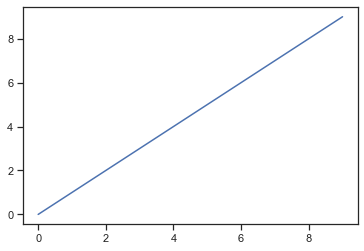

In [8]:
sns.set(style="ticks")
plt.plot(np.arange(10))
plt.show()

##  lmplot(回归图)

lmplot是用来绘制回归图的，通过lmplot我们可以直观地总览数据的内在关系。

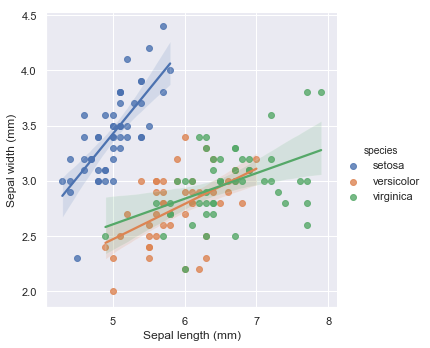

In [7]:
"""
Multiple linear regression
==========================

"""
sns.set()

# Load the iris dataset
iris = sns.load_dataset("iris")

# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="sepal_length", y="sepal_width", hue="species",
               truncate=True, height=5, data=iris)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Sepal length (mm)", "Sepal width (mm)")


##  kdeplot(核密度估计图)
核密度估计(kernel density estimation)是在概率论中用来估计未知的密度函数，属于非参数检验方法之一。通过核密度估计图可以比较直观的看出数据样本本身的分布特征。具体用法如下：

Text(3.8,4.5,'setosa')

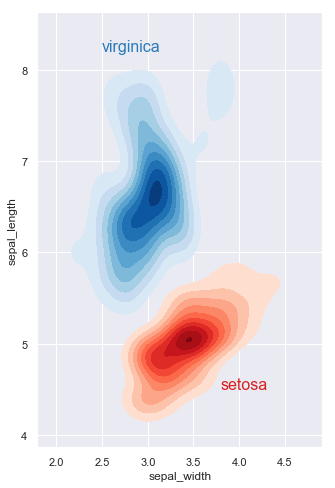

In [10]:
"""
Multiple bivariate KDE plots
============================
"""
sns.set(style="darkgrid")
iris = sns.load_dataset("iris")

# Subset the iris dataset by species
setosa = iris.query("species == 'setosa'")
virginica = iris.query("species == 'virginica'")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(3.8, 4.5, "setosa", size=16, color=red)

##  distplot(单变量分布直方图)
在seaborn中想要对单变量分布进行快速了解最方便的就是使用`distplot()`函数，默认情况下它将绘制一个直方图，并且可以同时画出核密度估计(KDE)。

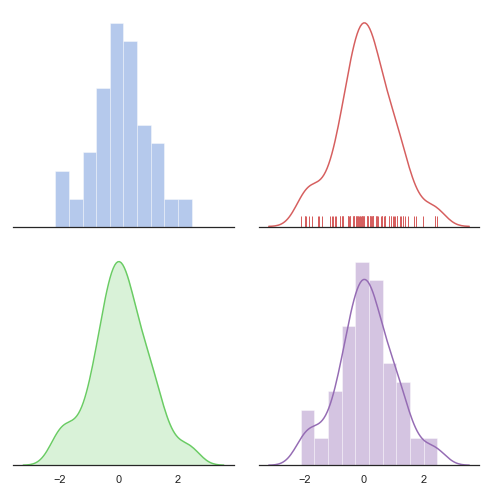

In [15]:
"""
Distribution plot options
=========================

"""
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a historgram and kernel density estimate
sns.distplot(d, color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

## heatmap热力图
利用热力图可以看数据表里多个特征两两的相似度。

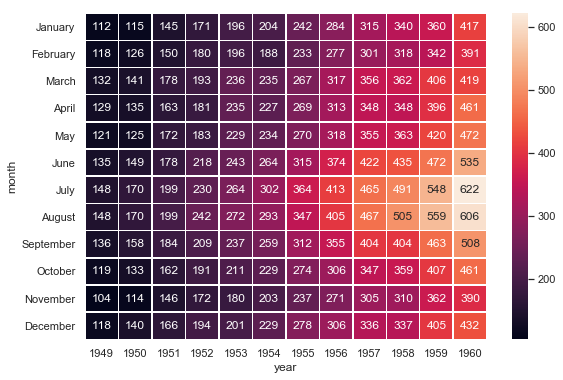

In [23]:
"""
Annotated heatmaps
==================

"""
sns.set()

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

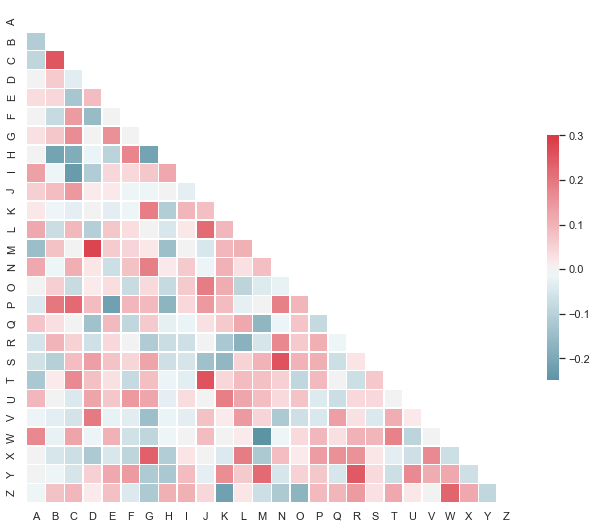

In [24]:
"""
Plotting a diagonal correlation matrix
======================================

"""
from string import ascii_letters

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## PairGrid
用于绘制数据集中成对关系的子图网格。

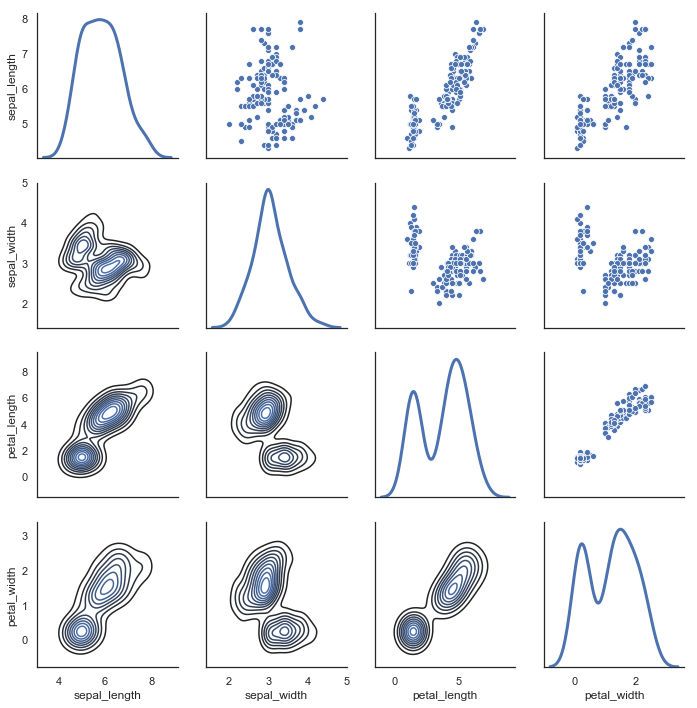

In [36]:
"""
Paired density and scatterplot matrix
=====================================

"""

sns.set(style="white")

df = sns.load_dataset("iris")

g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)


## residplot
线性回归残差图

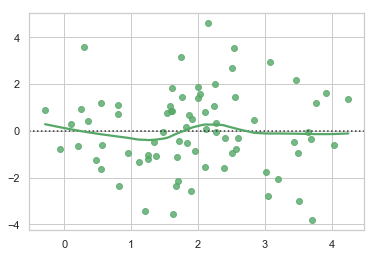

In [38]:
"""
Plotting model residuals
========================

"""

sns.set(style="whitegrid")

# Make an example dataset with y ~ x
rs = np.random.RandomState(7)
x = rs.normal(2, 1, 75)
y = 2 + 1.5 * x + rs.normal(0, 2, 75)

# Plot the residuals after fitting a linear model
sns.residplot(x, y, lowess=True, color="g")


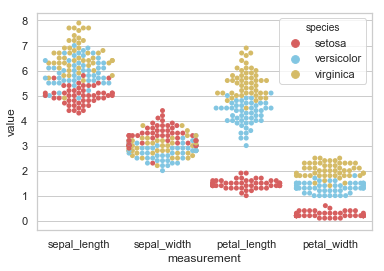

In [40]:
"""
Scatterplot with categorical variables
======================================

"""

sns.set(style="whitegrid", palette="muted")

# Load the example iris dataset
iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="species",
              palette=["r", "c", "y"], data=iris)


## pairplot
变量关系组图

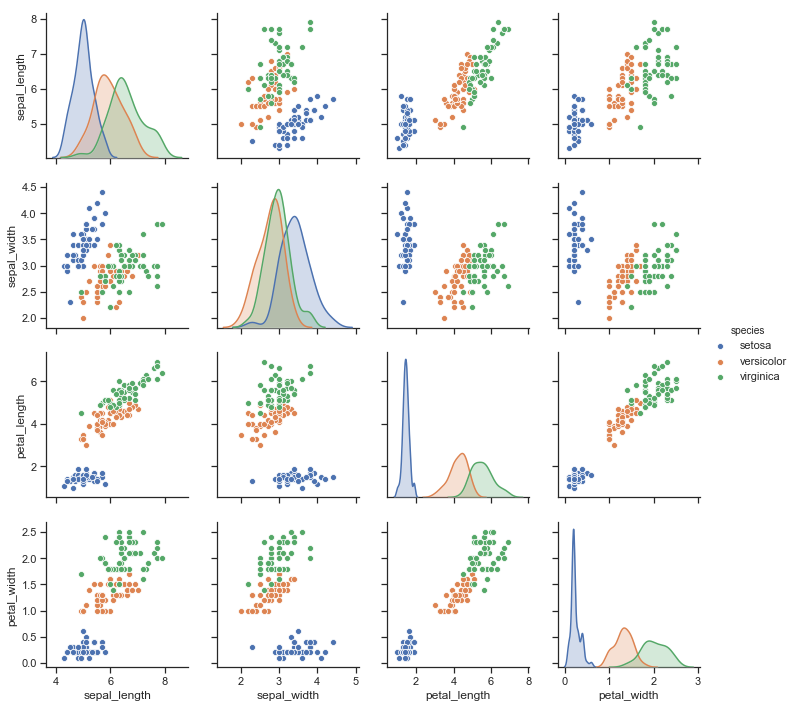

In [41]:
"""
Scatterplot Matrix
==================

"""

sns.set(style="ticks")

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")
